<h1 align="center">MLP LAB</h1>

##Install PyTorch + Imports

##Dataset

In [0]:
import numpy as np
import pandas as pd
from IPython.core.debugger import set_trace

In [0]:
import torchvision.datasets as dset
import torchvision.transforms as transforms

training_data = dset.MNIST(root='../data', transform = transforms.ToTensor(),train = True, download = True)
testing_data = dset.MNIST(root='../data', transform = transforms.ToTensor(),train = False, download = True)

In [1]:
import platform
import io

import matplotlib.pyplot as plt
from google.colab import files
from matplotlib.pyplot import cm 

def install_pytorch():
    os = platform.system()
    if os == "Linux":
        !pip3 install http://download.pytorch.org/whl/cu90/torch-0.4.0-cp36-cp36m-linux_x86_64.whl
    elif os == "Windows":
        !pip3 install http://download.pytorch.org/whl/cu90/torch-0.4.0-cp36-cp36m-win_amd64.whl 
    !pip3 install torchvision


# Install PyTorch.
install_pytorch()


import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

    95% |██████████████████████████████▊ | 543.3MB 22.9MB/s eta 0:00:02

    100% |████████████████████████████████| 566.4MB 45.5MB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5e644000 @  0x7f1bcaeca1c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 61kB 2.2MB/s 
    100% |████████████████████████████████| 2.0MB 6.0MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


**Split Training and Test Data**

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(testing_data, test_size = 0.20)

batch_size = 100
train_loader = torch.utils.data.DataLoader(dataset = training_data,
                                           batch_size = batch_size,
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = testing_data,
                                          batch_size = batch_size,
                                          shuffle = False)
len(train)
len(test)

2000

In [17]:
d = list(training_data)
d[0][0].shape

torch.Size([1, 28, 28])

In [11]:
# Get Rid of One Dimension via Squeeze

image = d[0][0].squeeze()
image.shape

torch.Size([28, 28])

Target: 5


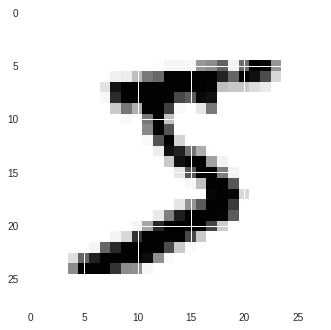

In [18]:
# Get a Target
target = d[0][1] #d[1][1] works as well. 
print('Target: {}'.format(target))

plt.imshow(image)
plt.show()

##Neutral Network

In [36]:
# Create Model and Test Model
import torch.nn as nn
import torch.nn.functional as F
input_size = 800
hidden_size = 500
num_classes = 10

# Write the code to define your neural net below. Don't forget the hyperparameters
# like the hidden state sizes for the input layer, hidden layers and output layer
class MLP(nn.Module):
    def __init__(self,input_size, hidden_size, num_classes):
       super(MLP, self).__init__()
       self.fc1 = nn.Linear(input_size,hidden_size)
       self.fc2 = nn.Linear(hidden_size,hidden_size)
       self.fc3 = nn.Linear(hidden_size,num_classes)
    
    def forward(self, x):        
        # your forward pass code
        # You will use the Linear/Conv2D classes declared in the constructor
        # and use the functional nonlinear functions as activations, such as F.relu
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        # The last layer activation function depends on your loss function and task
        out = self.fc3(out)
        return out

model = MLP(input_size,hidden_size,num_classes)
     
# Print a summary of your model. Everything looks right?
print(model)
print("# parametre: ", sum([param.nelement() for param in model.parameters()]))

MLP(
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=10, bias=True)
)
# parametre:  656010


##Loss and Optimizer
What loss function will you use? Since you are doing caetegorical classification, what is an appropriate loss function that we saw in class? 

Hint: check the PyTorch [loss functions docs](https://pytorch.org/docs/master/nn.html?highlight=loss#loss-functions), of course! And while you're at it, grab an [appropriate optimizer](https://pytorch.org/docs/stable/optim.html?highlight=optim#torch.optim.SGD)

In [0]:
criterion = nn.CrossEntropyLoss() # your loss function
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001) # your optimizer, choose one of PyTorch's optimizer

## Train/Evaluate Model

In this cell you will write a function which loops your dataset for the max number of epochs and trains the model. At the end of each epoch, evaluate the model and save the results!

In [37]:
losses_train = []
losses_val = []
global_step = 0
#epochs = 20

num_epochs = 1

# Start training
#for epoch in range(num_epochs):
    #model.train()
   # for images, labels in train_loader:
      #  global_step += 1
        # Your code where you use `model` to predict the labels
        #output = model(images)
        # Measure the loss compared to the true target
       # train_loss = criterion(output, labels)
       # losses_train.append((global_step, train_loss))
        # Before you update your weights, don't forget the set the gradients to zero!
        # Update your model with the optimizer!
     
    # Evaluation
   # model.eval() # what's this?
    # your code where you evaluate `model` on the validation set
    #output = ... # output of the validation data
    #val_loss = ...
    #losses_val.append((global_step, val_loss))

total_loss = []

for epoch in range(num_epochs):
    
    train_loss = 0
    n_iter = 0
    
    # Iterate over data.
    for i, (images, labels) in enumerate(train_loader):  
        
        # Flatten the images
        images = images.view(-1, 28*28)
        
        # Zero the gradient buffer
        optimizer.zero_grad()  
        
        # Forward
        outputs = model(images)
        
        loss = criterion(outputs, labels)
        total_loss.append(loss)
        # Backward
        loss.backward()
        
        # Optimize
        optimizer.step()
        
        # Statistics
        train_loss += loss.data[0]
        n_iter += 1
    
    print('Epoch: {}/{}, Loss: {:.4f}'.format(
          epoch+1, num_epochs, train_loss/n_iter))


RuntimeError: ignored

## Show the results of training

In [0]:
# Plot the training and validation losses
# You'll need to implement this function!
plot_results(losses_val, losses_train)